Part 1: Making the Data Set 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Quiz_Average': [
        18, 45, 72, 30, 88, 55, 67, 25, 60, 91,
        40, 52, 78, 22, 95, 58, 70, 35, 64, 85,
        28, 48, 75, 33, 98, 62, 82, 27, 69, 90,
        20, 50, 73, 38, 92, 57, 80, 32, 66, 87
    ],

    'Time_Spent_Minutes': [
        35, 40, 70, 25, 45, 60, 65, 30, 55, 50,
        75, 48, 72, 20, 42, 58, 80, 33, 60, 68,
        28, 52, 75, 45, 40, 65, 78, 22, 58, 55,
        50, 50, 70, 42, 48, 62, 85, 30, 57, 60
    ],

    'Problems_Solved': [
        12, 40, 78, 22, 85, 50, 72, 18, 65, 88,
        55, 45, 80, 15, 98, 54, 75, 28, 68, 82,
        20, 42, 77, 35, 100, 60, 85, 17, 70, 90,
        14, 48, 76, 40, 92, 55, 88, 25, 67, 84
    ],

    'Pass_Class': [
        0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1
    ]
}

df = pd.DataFrame(data)
df

,Quiz_Average,Time_Spent_Minutes,Problems_Solved,Pass_Class
0,18,35,12,0
1,45,40,40,1
2,72,70,78,1
3,30,25,22,0
4,88,45,85,1
5,55,60,50,1
6,67,65,72,1
7,25,30,18,0
8,60,55,65,1
9,91,50,88,1


Part 2:  Exploratory Data Analysis

In [2]:
df.describe()

,Quiz_Average,Time_Spent_Minutes,Problems_Solved,Pass_Class
count,40.000000,40.000000,40.000000,40.000000
mean,58.925000,52.575000,57.875000,0.750000
std,23.921225,16.885569,26.888361,0.438529
min,18.000000,20.000000,12.000000,0.000000
25%,37.250000,41.500000,38.750000,0.750000
50%,61.000000,53.500000,62.500000,1.000000
75%,78.500000,65.000000,80.500000,1.000000
max,98.000000,85.000000,100.000000,1.000000


Part 3: Visualization

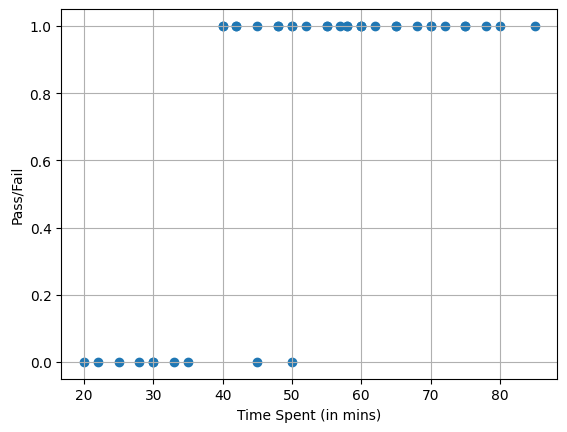

In [3]:
plt.scatter(df['Time_Spent_Minutes'],df['Pass_Class'],marker='o')
plt.xlabel("Time Spent (in mins)")
plt.ylabel("Pass/Fail")
plt.grid()
plt.show()

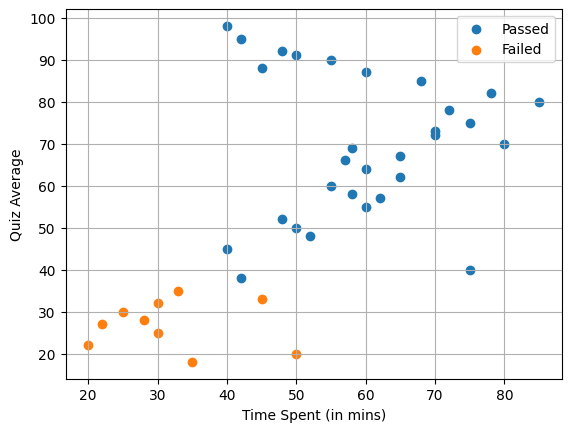

In [4]:
passed = df[df['Pass_Class'] == 1]
failed = df[df['Pass_Class'] == 0]

#Basically did so in order to make them the same colour and seperated passed and failed students

plt.scatter(passed['Time_Spent_Minutes'], passed['Quiz_Average'], label='Passed')
plt.scatter(failed['Time_Spent_Minutes'], failed['Quiz_Average'], label='Failed')
plt.xlabel("Time Spent (in mins)")
plt.ylabel("Quiz Average")
plt.legend()
plt.grid(True)
plt.show()

Part 4: Training the Classification Model (Logistic Regression) 

In [5]:
#Logistic Regression is the best as we have a binary representation of pass and fail

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#We are going to split the data frame in order to train and test our model 

X_train, X_test, y_train, y_test = train_test_split(df[['Quiz_Average', 'Time_Spent_Minutes', 'Problems_Solved']],df['Pass_Class'],train_size=0.85)
X_train


,Quiz_Average,Time_Spent_Minutes,Problems_Solved
37,32,30,25
5,55,60,50
9,91,50,88
2,72,70,78
13,22,20,15
12,78,72,80
29,90,55,90
16,70,80,75
33,38,42,40
8,60,55,65


In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

Part 5: Evaluating the Model


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1 Score:", f1_score(y_test, y_predict))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Part 6: Confusion Matrix

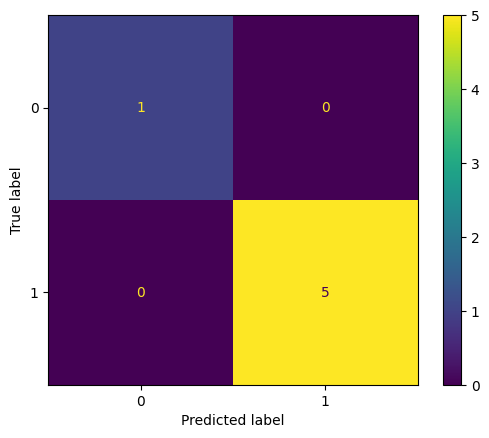

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

Part 7: Interpretation

The model predicts whether a student will pass or fail based on quiz average, time spent and problems solved.
Most predictions are correct according to the confusion matrix.

Logistic Regression can be used to classify routes into fast or slow categories in the SmartPath navigation system.


Part 8: Improvement

The model can be improved by using more student data and adding features like attendance.